# Convolutional autoencoder

In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test =np.reshape(x_test, (len(x_test), 28, 28, 1))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28,28,1)) # adapt this if using 'channels_first' image data format

x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# at this point representation is (4, 4, 8) i.e. 128-dimentional

x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 18s 307us/step - loss: 0.2220 - val_loss: 0.1772
Epoch 2/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1520 - val_loss: 0.1429
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1382 - val_loss: 0.1298
Epoch 4/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1309 - val_loss: 0.1254
Epoch 5/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.1261 - val_loss: 0.1233
Epoch 6/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1228 - val_loss: 0.1205
Epoch 7/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1204 - val_loss: 0.1169
Epoch 8/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1180 - val_loss: 0.1163
Epoch 9/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1161 - val_loss: 0.

In [0]:
decoded_imgs = autoencoder.predict(x_test)

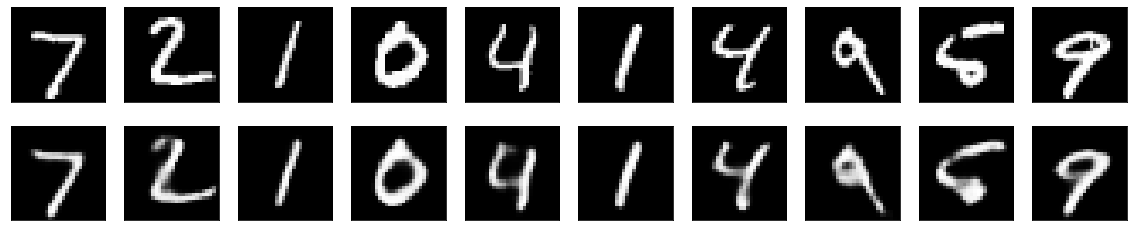

In [7]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax =  plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()